## Homework 5
Cody Costa\
9/5/2025

<hr>

# Problem 1: LMS FIR filter metrics in MATLAB

the below photo includes the modified source code and the following subplots:

1. desired signal vs output
2. Error signal over time
3. Adapted filter coefficients vs true coefficients

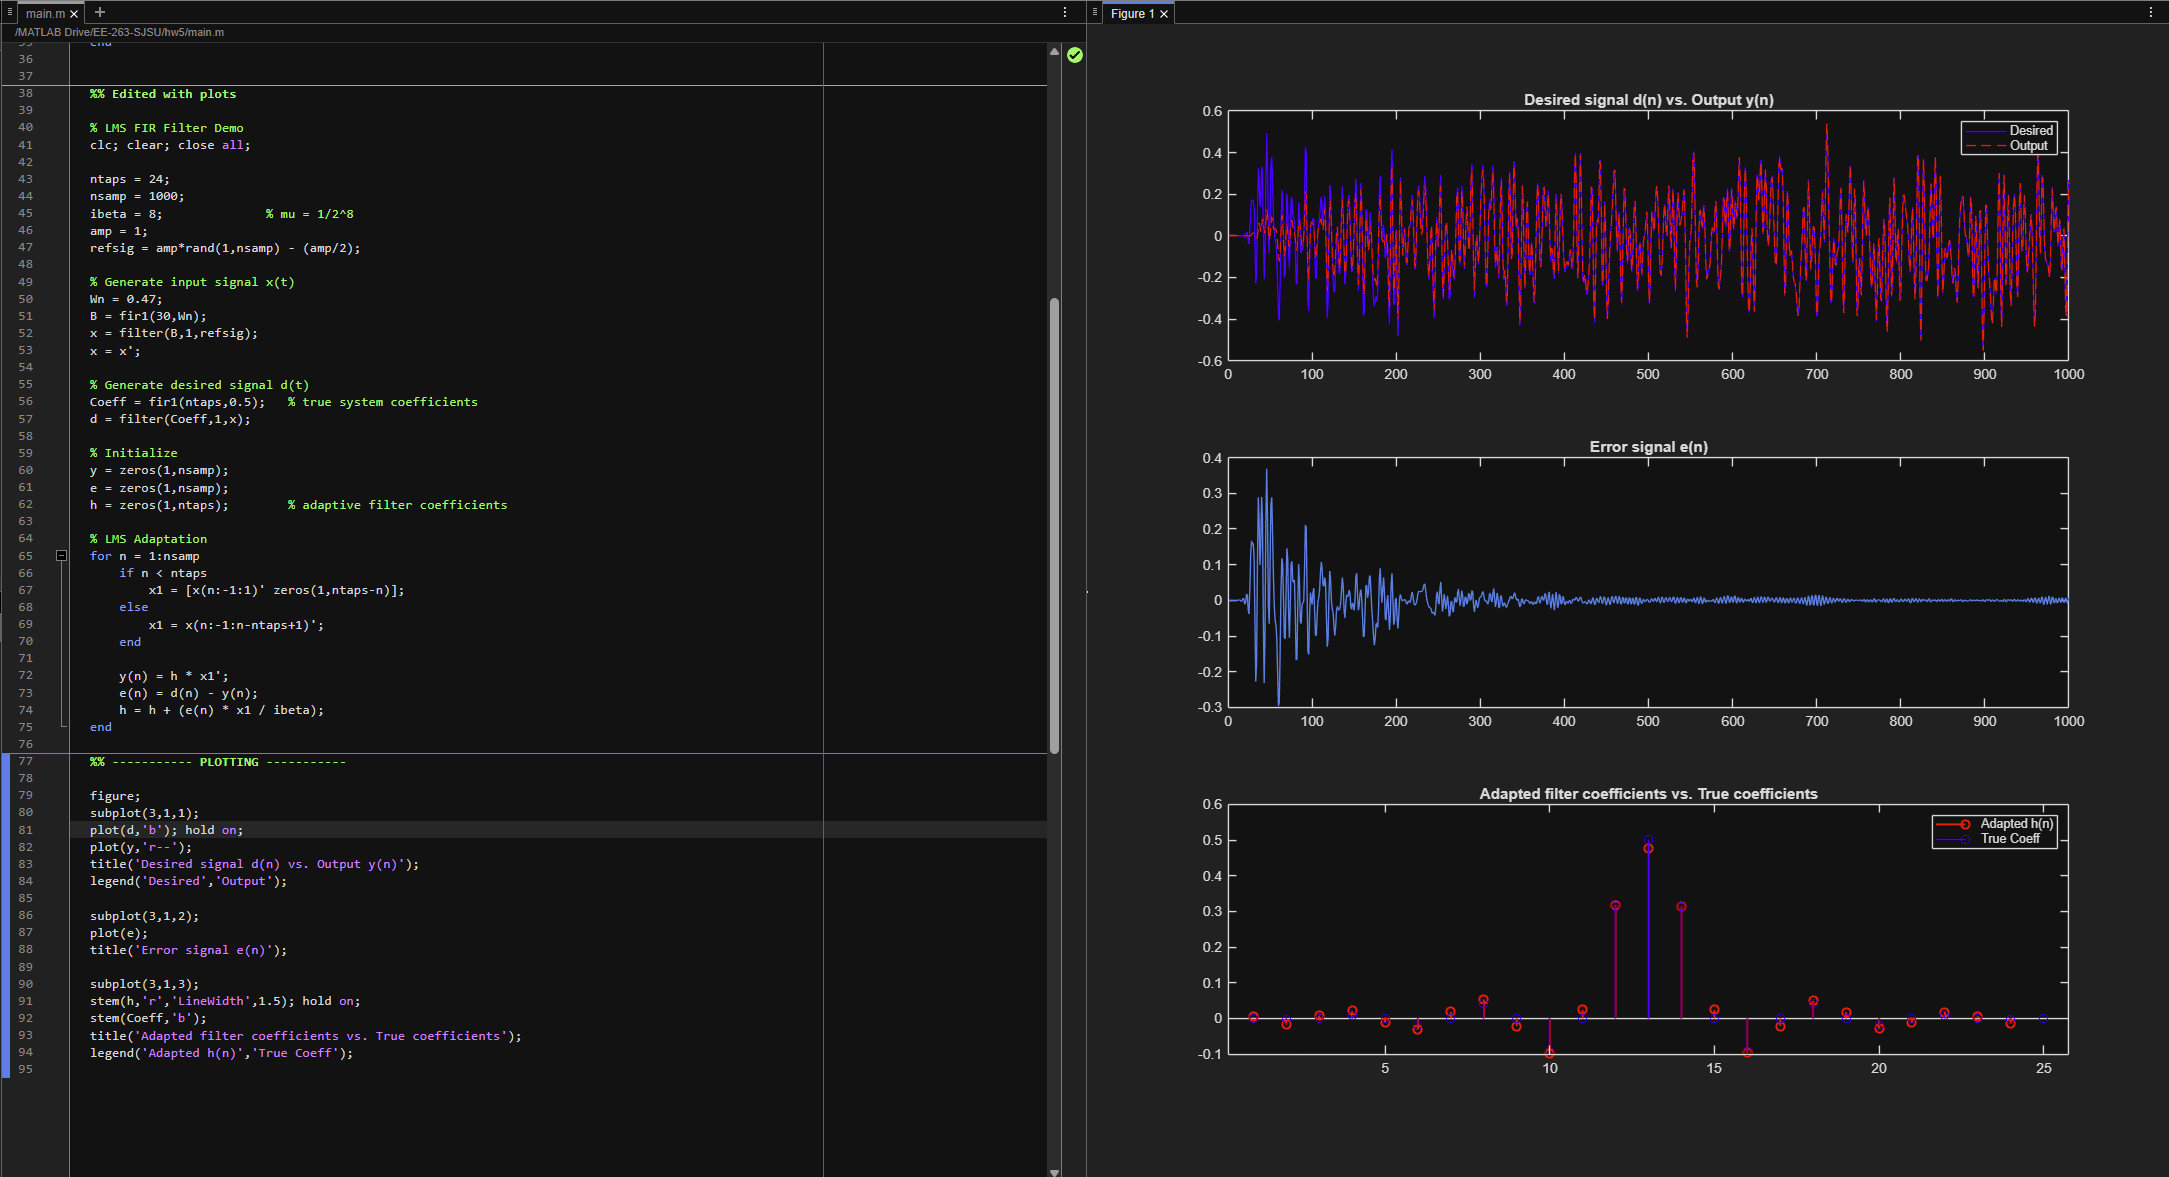

<hr>

# Problem 2

updating CNN weights

In [2]:
import numpy as np

# define sigmoid and its derivative function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(y):

    # y = sigmoid(x)
    return y * (1 - y)


# starting data

x = np.array([0.25, 0.275])     # given inputs
t = np.array([0.875, 0.125])    # target outputs


# initial weights

# 1. Input --> Hidden

W_IH = np.array([
    [0.25, 0.375, 0.5],     # h1
    [0.125, 0.625, 0.125]   # h2
])

# 2. Hidden --> Output

W_HO = np.array([
    [0.5, 0.75, 0.25],      # o1
    [0.375, 0.875, 0.5]     # o2
])


# Forward Pass

# add the bias inputs
x_bias = np.append(x, 1)

# hidden layer
net_h = W_IH @ x_bias
h = sigmoid(net_h)
h_bias = np.append(h, 1)

# output layer
net_o = W_HO @ h_bias
o = sigmoid(net_o)

print(f'Forward Pass Outputs: {o}\n')


# Backward Pass

# output delta
delta_o = (t - o) * sigmoid_derivative(o)

# hidden delta
delta_h = (W_HO[:, :-1].T @ delta_o) * sigmoid_derivative(h)


# Update Weights

# Hidden --> Output
dW_HO = np.outer(delta_o, h_bias)

# Input --> Hidden
dW_IH = np.outer(delta_h, x_bias)

# apply update
W_HO_new = W_HO + dW_HO
W_IH_new = W_IH + dW_IH


print(f'New input --> hidden weights: \n{W_IH_new}\n')
print(f'New hidden --> output weights: \n{W_HO_new}')

Forward Pass Outputs: [0.7342393  0.77839477]

New input --> hidden weights: 
[[0.24840054 0.3732406  0.49360217]
 [0.12025271 0.61977798 0.10601085]]

New hidden --> output weights: 
[[0.51814252 0.7659666  0.27746691]
 [0.30055365 0.80948237 0.38729179]]


<hr>

# Problem 3

Animals-6 simplification to only cat and chicken

### Step 1: Filter Dataset to Only Cats and Chickens

In [2]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# animals data directory
dataset_dir = f'{os.path.expanduser('~')}\\Downloads\\archive\\raw-img'
# print(dataset_dir)

selected_classes = {
    'cat': 0,
    'chicken': 1
}

# function to parse, load, and resize img files in dataset folder
def load_img(directory, classes):
    Images = []
    Labels = []

    for label_name, label_code in classes.items():
        folder = os.path.join(directory, label_name)

        for image_file in os.listdir(folder):
            try:
                img = cv2.imread(os.path.join(folder, image_file))
                img = cv2.resize(img, (128, 128))
                Images.append(img)
                Labels.append(label_code)

            except:
                continue

    return shuffle(np.array(Images), np.array(Labels), random_state=42)


# Load cats and chickens images
x, y = load_img(dataset_dir, selected_classes)

print(f'dataset shape:  [{x.shape}, {y.shape}]')
print(f'uniques:    {np.unique(y)}')

dataset shape:  [(4766, 128, 128, 3), (4766,)]
uniques:    [0 1]


### Step 2: Normalize / split data

In [3]:
x = x.astype('float32') / 255

# split data into training, validation, and testing
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


print(f'Training set:   {x_train.shape}, {y_train.shape}')
print(f'Validation set: {x_val.shape}, {y_val.shape}')
print(f'Testing set:    {x_test.shape}, {y_test.shape}')

Training set:   (3336, 128, 128, 3), (3336,)
Validation set: (715, 128, 128, 3), (715,)
Testing set:    (715, 128, 128, 3), (715,)


### Step 3: Train the CNN with 3 convolutional layers

In [ ]:
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = keras.models.Sequential()

model.add(keras.Input(shape=(128, 128, 3)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

# added conv layer
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))  
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  # binary output

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - accuracy: 0.7260 - loss: 0.5358 - val_accuracy: 0.7888 - val_loss: 0.4857
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.8336 - loss: 0.3887 - val_accuracy: 0.8378 - val_loss: 0.3630
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 15s 139ms/step - accuracy: 0.8591 - loss: 0.3482 - val_accuracy: 0.8643 - val_loss: 0.3218
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.8909 - loss: 0.2839 - val_accuracy: 0.8699 - val_loss: 0.3072
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.8969 - loss: 0.2586 - val_accuracy: 0.8671 - val_loss: 0.2995
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.9122 - loss: 0.2301 - val_accuracy: 0.8769 - val_loss: 0.2717
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.9257 - loss: 0.1855 - val_accuracy: 0.8839 - val_loss: 0.2812
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9299 - loss: 0

### Step 4: Report Accuracy

In [6]:
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {acc:.3f}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9049 - loss: 0.2330
Test Accuracy: 0.905


<hr>

# Problem 4

Improvements to Animals-6

### Step 1: Preprocessing; Include all 6 animal classes

In [47]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# animals data directory
dataset_dir = f'{os.path.expanduser('~')}\\Downloads\\archive\\raw-img'

selected_classes = {
    "butterfly": 0,
    "cat": 1,
    "chicken": 2,
    "elephant": 3,
    "horse": 4,
    "spider": 5
}


''' We will be reusing the load_img function defined in Problem 3 '''

x, y = load_img(dataset_dir, selected_classes)

print(f'dataset shape:  [{x.shape}, {y.shape}]')
print(f'uniques:    {np.unique(y)}')

dataset shape:  [(15768, 128, 128, 3), (15768,)]
uniques:    [0 1 2 3 4 5]


### Step 2: Normalize / split data

In [48]:
x = x.astype('float32') / 255

# split data into training, validation, and testing
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


print(f'Training set:   {x_train.shape}, {y_train.shape}')
print(f'Validation set: {x_val.shape}, {y_val.shape}')
print(f'Testing set:    {x_test.shape}, {y_test.shape}')

Training set:   (11037, 128, 128, 3), (11037,)
Validation set: (2365, 128, 128, 3), (2365,)
Testing set:    (2366, 128, 128, 3), (2366,)


### Step 3: Stronger CNN model

we'll use some deeper architecture methods for this iteration:
1. 3 block system (VGG style)
2. Dropouts for regularization
3. Batch Normalization for more stable training

In [43]:
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

model = keras.models.Sequential()

model.add(keras.Input(shape=(128,128,3)))

# Conv block 1
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv block 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv block 3
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Conv block 4 (optional but helps performance)
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Dense classifier
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',        # what metric to monitor
    patience=5,                # wait 5 epochs with no improvement
    restore_best_weights=True  # use the best weights seen
)


### Step 4: Data Augmentation and Training

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,                           # set a high cap
    validation_data=(x_val, y_val),
    callbacks=[early_stop],              # add early stopping
    verbose=1
)



Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 75s 783ms/step - accuracy: 0.4950 - loss: 1.7412 - val_accuracy: 0.2314 - val_loss: 2.9243
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 72s 779ms/step - accuracy: 0.6210 - loss: 0.9911 - val_accuracy: 0.1962 - val_loss: 5.3595
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 74s 802ms/step - accuracy: 0.6529 - loss: 0.8983 - val_accuracy: 0.4251 - val_loss: 2.5780
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 73s 788ms/step - accuracy: 0.6809 - loss: 0.8309 - val_accuracy: 0.4916 - val_loss: 1.5515
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 72s 783ms/step - accuracy: 0.6933 - loss: 0.8216 - val_accuracy: 0.6317 - val_loss: 1.2276
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 72s 785ms/step - accuracy: 0.7243 - loss: 0.7203 - val_accuracy: 0.6173 - val_loss: 1.0629
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 72s 780ms/step - accuracy: 0.6988 - loss: 0.8060 - val_accuracy: 0.4412 - val_loss: 1.1506
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 72s 778ms/step - accuracy: 0.7408 - loss: 0.6936 - val_accu

### Step 5:   Report Accuracy

In [46]:
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {acc:.3f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8599 - loss: 0.3929
Test Accuracy: 0.860
